In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Para gráficos interactivos

# RECONOCIENDO EL DATASET

In [2]:
# Cargar el archivo CSV
df = pd.read_csv('Tweets.csv/Tweets.csv')

# Mostrar las primeras filas del dataset
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# Ver información general del dataset
df.info()

# Resumen estadístico
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [4]:
# Identificar valores únicos en cada columna
for col in df.columns:
    print(f"Valores únicos en '{col}': {df[col].nunique()}")

# Verificar si hay valores nulos
df.isnull().sum()


Valores únicos en 'tweet_id': 14485
Valores únicos en 'airline_sentiment': 3
Valores únicos en 'airline_sentiment_confidence': 1023
Valores únicos en 'negativereason': 10
Valores únicos en 'negativereason_confidence': 1410
Valores únicos en 'airline': 6
Valores únicos en 'airline_sentiment_gold': 3
Valores únicos en 'name': 7701
Valores únicos en 'negativereason_gold': 13
Valores únicos en 'retweet_count': 18
Valores únicos en 'text': 14427
Valores únicos en 'tweet_coord': 832
Valores únicos en 'tweet_created': 14247
Valores únicos en 'tweet_location': 3081
Valores únicos en 'user_timezone': 85


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

# MUESTREO

# FILTRADO DE DATOS

## DATOS TABULARES

In [5]:
import pandas as pd

# Cargar el archivo CSV
file_path = "COVID_DEATH_HISTORIC.csv" 
df = pd.read_csv(file_path)

#### ELIMINACION DE COLUMNAS

In [6]:
import pandas as pd

def eliminar_columnas_csv(input_file, output_file, columnas_a_eliminar):
    """
    Elimina columnas específicas de un archivo CSV y guarda el resultado en un nuevo archivo.
    
    Parámetros:
    - input_file: str
        Ruta del archivo CSV original.
    - output_file: str
        Ruta del archivo CSV resultante.
    - columnas_a_eliminar: list
        Lista de nombres de columnas a eliminar.
    """
    # Cargar el archivo CSV
    df = pd.read_csv(input_file)
    
    # Verificar si las columnas existen
    columnas_existentes = [col for col in columnas_a_eliminar if col in df.columns]
    if not columnas_existentes:
        print("No se encontró ninguna de las columnas a eliminar en el archivo.")
        return
    
    # Eliminar las columnas
    df_cleaned = df.drop(columns=columnas_existentes)
    
    # Guardar el nuevo archivo CSV
    df_cleaned.to_csv(output_file, index=False)
    print(f"Archivo guardado exitosamente en: {output_file}")


In [7]:
# Ejemplo de uso
ruta_original = "archivo_limpio.csv"  # Cambia esto por tu archivo original
ruta_nueva = "ressultado.csv"       # Cambia esto por el archivo de salida
columnas_a_eliminar = ["Week Start", "Week End","Row ID","ZIP Code Location"]   # Cambia esto por las columnas que deseas eliminar

eliminar_columnas_csv(ruta_original, ruta_nueva, columnas_a_eliminar)

Archivo guardado exitosamente en: ressultado.csv


### MANEJO DE VALORES NULOS

In [8]:

# Identificar columnas con valores nulos
print("Resumen de valores nulos por columna:")
display(df.isnull().sum())

# Crear opciones en diferentes celdas para un flujo más claro
def manejar_valores_nulos(opcion, relleno_opcion=None, valor=None, guardar=False, output_path="archivo_limpio.csv"):
    global df_cleaned  # Para acceder al DataFrame fuera de la función
    if opcion == 1:
        # Eliminar filas con valores nulos
        df_cleaned = df.dropna()
        print("\nFilas con valores nulos eliminadas.")
    elif opcion == 2:
        if relleno_opcion == 1:
            # Rellenar con un valor constante
            try:
                valor = eval(valor)  # Convierte a tipo numérico si es posible
            except:
                pass  # Mantener como texto si no es convertible
            df_cleaned = df.fillna(valor)
        elif relleno_opcion == 2:
            # Rellenar con la media
            df_cleaned = df.fillna(df.mean(numeric_only=True))
        elif relleno_opcion == 3:
            # Rellenar con la mediana
            df_cleaned = df.fillna(df.median(numeric_only=True))
        elif relleno_opcion == 4:
            # Rellenar con el modo
            df_cleaned = df.fillna(df.mode().iloc[0])
        else:
            print("Opción de relleno no válida. No se realizaron cambios.")
            df_cleaned = df.copy()
    else:
        print("Opción no válida. No se realizaron cambios.")
        df_cleaned = df.copy()

    print("\nResumen del DataFrame limpio:")
    display(df_cleaned.head())

    # Guardar si se indica
    if guardar:
        df_cleaned.to_csv(output_path, index=False)
        print(f"\nArchivo limpio guardado en: {output_path}")


Resumen de valores nulos por columna:


ZIP Code                                  0
Week Number                               0
Week Start                                0
Week End                                  0
Cases - Weekly                          223
Cases - Cumulative                      223
Case Rate - Weekly                      223
Case Rate - Cumulative                  223
Tests - Weekly                          392
Tests - Cumulative                        0
Test Rate - Weekly                        0
Test Rate - Cumulative                    0
Percent Tested Positive - Weekly          0
Percent Tested Positive - Cumulative      0
Deaths - Weekly                           0
Deaths - Cumulative                       0
Death Rate - Weekly                       0
Death Rate - Cumulative                   0
Population                                0
Row ID                                    0
ZIP Code Location                       211
dtype: int64

In [9]:
# Ejemplo de uso interactivo
# Para eliminar filas:
manejar_valores_nulos(1, guardar=True)

# Para rellenar con un valor constante:
# manejar_valores_nulos(2, relleno_opcion=1, valor="0", guardar=True)



Filas con valores nulos eliminadas.

Resumen del DataFrame limpio:


,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60622,31,07/26/2020,08/01/2020,28.0,877.0,53.0,1661.2,1329.0,13148,...,24904.8,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-31,POINT (-87.681818 41.902762)
1,60622,32,08/02/2020,08/08/2020,34.0,911.0,64.0,1725.6,1405.0,14553,...,27566.2,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-32,POINT (-87.681818 41.902762)
2,60622,33,08/09/2020,08/15/2020,41.0,952.0,78.0,1803.3,1542.0,16095,...,30487.0,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-33,POINT (-87.681818 41.902762)
3,60622,34,08/16/2020,08/22/2020,42.0,994.0,80.0,1882.8,1674.0,17769,...,33657.9,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-34,POINT (-87.681818 41.902762)
4,60622,35,08/23/2020,08/29/2020,45.0,1039.0,85.0,1968.1,1540.0,19309,...,36574.9,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-35,POINT (-87.681818 41.902762)



Archivo limpio guardado en: archivo_limpio.csv


### FILAS DUPLICADAS

In [10]:
def manejar_duplicados(accion, guardar=False, output_path="archivo_sin_duplicados.csv"):
    """
    Maneja filas duplicadas en el DataFrame.
    
    Parámetros:
    - accion: int
        1 para identificar duplicados, 2 para eliminarlos.
    - guardar: bool
        Si True, guarda el DataFrame resultante en un archivo CSV.
    - output_path: str
        Ruta donde se guarda el archivo limpio.
    """
    global df_cleaned  # Para acceder al DataFrame limpio globalmente
    if accion == 1:
        # Identificar filas duplicadas
        duplicados = df.duplicated()
        print(f"\nNúmero de filas duplicadas: {duplicados.sum()}")
        display(df[duplicados])
    elif accion == 2:
        # Eliminar filas duplicadas
        df_cleaned = df.drop_duplicates()
        print("\nFilas duplicadas eliminadas.")
        display(df_cleaned.head())
        
        # Guardar si se indica
        if guardar:
            df_cleaned.to_csv(output_path, index=False)
            print(f"\nArchivo sin duplicados guardado en: {output_path}")
    else:
        print("Opción no válida. No se realizaron cambios.")


Esto mostrará el número total de filas duplicadas y las filas duplicadas.

In [11]:
manejar_duplicados(1)



Número de filas duplicadas: 0


,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location


Para eliminar duplicados y guardar el archivo limpio

In [12]:
#manejar_duplicados(2, guardar=True, output_path="archivo_limpio_sin_duplicados.csv")

### CLASES DESBALANCEADAS

Distribución inicial de clases:


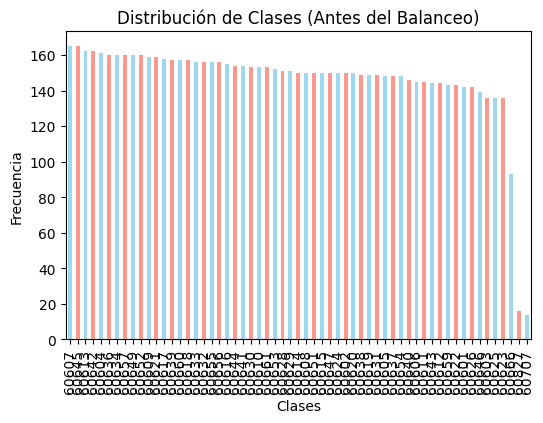


Después de aplicar SMOTE:


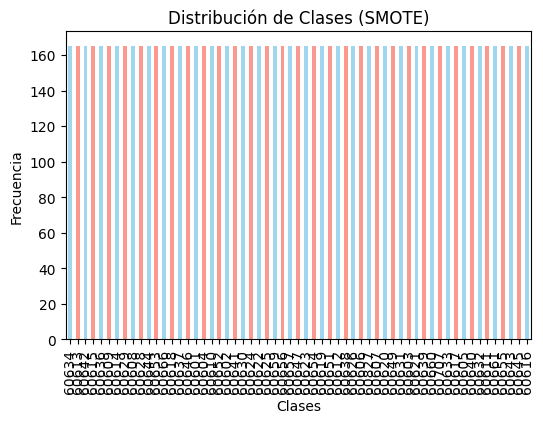


Después de aplicar Submuestreo:


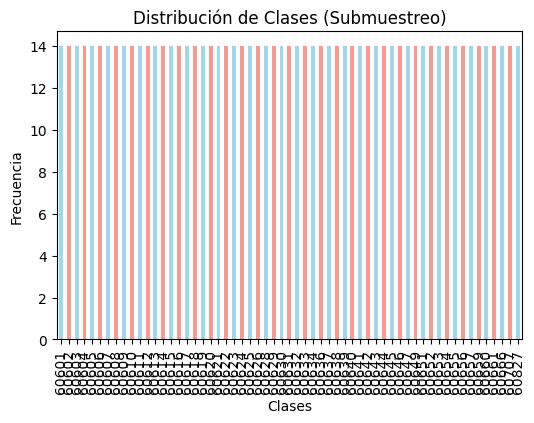


Después de aplicar SMOTEENN:


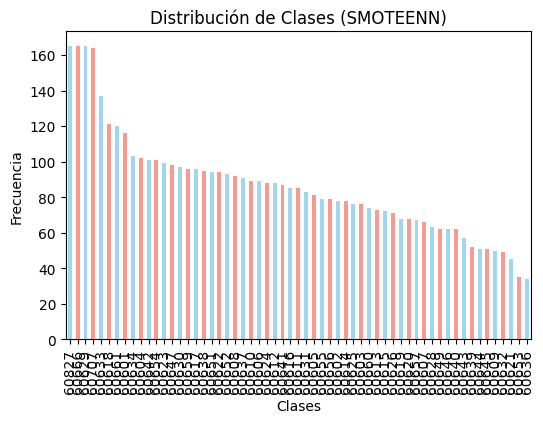


Dataset balanceado guardado en 'dataset_balanceado_smote.csv'


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "ressultado.csv"  # Cambia esto por la ruta de tu archivo
df = pd.read_csv(file_path)

# Separar características (X) y variable objetivo (y)
target_column = "ZIP Code"  # Cambia esto por el nombre de tu columna objetivo
X = df.drop(columns=[target_column])
y = df[target_column]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Función para graficar la distribución de clases
def graficar_distribucion(y, titulo):
    plt.figure(figsize=(6, 4))
    y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.8)
    plt.title(titulo)
    plt.xlabel("Clases")
    plt.ylabel("Frecuencia")
    plt.show()

# Distribución inicial
print("Distribución inicial de clases:")
graficar_distribucion(y_train, "Distribución de Clases (Antes del Balanceo)")

# 1. Sobremuestreo con SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("\nDespués de aplicar SMOTE:")
graficar_distribucion(pd.Series(y_smote), "Distribución de Clases (SMOTE)")

# 2. Submuestreo aleatorio
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

print("\nDespués de aplicar Submuestreo:")
graficar_distribucion(pd.Series(y_under), "Distribución de Clases (Submuestreo)")

# 3. Combinación de SMOTE y ENN
smote_enn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_train, y_train)

print("\nDespués de aplicar SMOTEENN:")
graficar_distribucion(pd.Series(y_smoteenn), "Distribución de Clases (SMOTEENN)")

# Opcional: Guardar uno de los datasets balanceados
df_smote = pd.DataFrame(np.hstack((X_smote, y_smote.values.reshape(-1, 1))),
                        columns=list(X.columns) + [target_column])
df_smote.to_csv("dataset_balanceado_smote.csv", index=False)
print("\nDataset balanceado guardado en 'dataset_balanceado_smote.csv'")


Técnicas de Balanceo:

Se aplica SMOTE, Submuestreo Aleatorio y SMOTEENN, y se muestra cómo cambia la distribución de las clases.
Solo se gudara un muestreo

### MANEJO DE OUTLIERS

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def manejar_outliers(df, columnas, metodo="IQR", limite=1.5, accion="eliminar", valor_reemplazo=None):
    """
    Maneja outliers en un DataFrame utilizando el método especificado.
    
    Parámetros:
    - df: pd.DataFrame
        El DataFrame en el que se buscarán y manejarán outliers.
    - columnas: list
        Lista de nombres de columnas donde buscar outliers.
    - metodo: str
        Método para detectar outliers ("IQR" o "zscore").
    - limite: float
        Limite para definir un outlier (1.5 para IQR o 3 para z-score).
    - accion: str
        Acción a realizar con los outliers ("eliminar" o "reemplazar").
    - valor_reemplazo: any
        Valor con el que reemplazar los outliers (si accion="reemplazar").
    
    Retorna:
    - df_limpio: pd.DataFrame
        El DataFrame limpio después de manejar los outliers.
    """
    df_limpio = df.copy()

    for columna in columnas:
        if metodo == "IQR":
            # Detectar outliers usando el rango intercuartílico (IQR)
            Q1 = df[columna].quantile(0.25)
            Q3 = df[columna].quantile(0.75)
            IQR = Q3 - Q1
            rango_inferior = Q1 - limite * IQR
            rango_superior = Q3 + limite * IQR
            outliers = (df[columna] < rango_inferior) | (df[columna] > rango_superior)
        elif metodo == "zscore":
            # Detectar outliers usando z-score
            mean = df[columna].mean()
            std = df[columna].std()
            z_scores = (df[columna] - mean) / std
            outliers = (np.abs(z_scores) > limite)
        else:
            raise ValueError("Método no reconocido. Usa 'IQR' o 'zscore'.")

        print(f"Columna: {columna} - Outliers detectados: {outliers.sum()}")

        # Acción a realizar con los outliers
        if accion == "eliminar":
            df_limpio = df_limpio[~outliers]
        elif accion == "reemplazar":
            df_limpio.loc[outliers, columna] = valor_reemplazo
        else:
            raise ValueError("Acción no válida. Usa 'eliminar' o 'reemplazar'.")

    return df_limpio



Outliers antes del manejo:


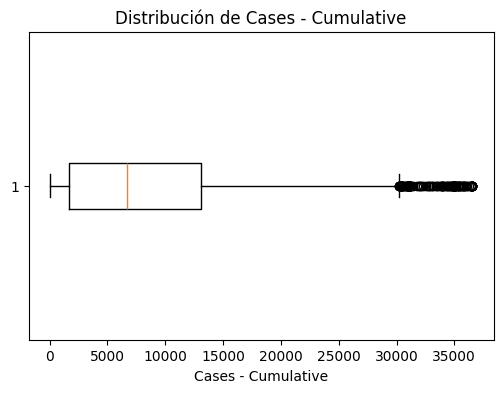

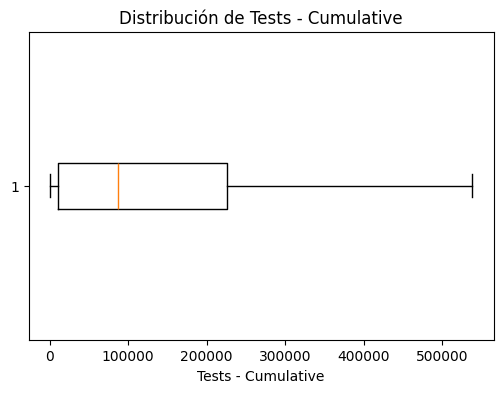

Columna: Cases - Cumulative - Outliers detectados: 108
Columna: Tests - Cumulative - Outliers detectados: 0
Outliers después del manejo:


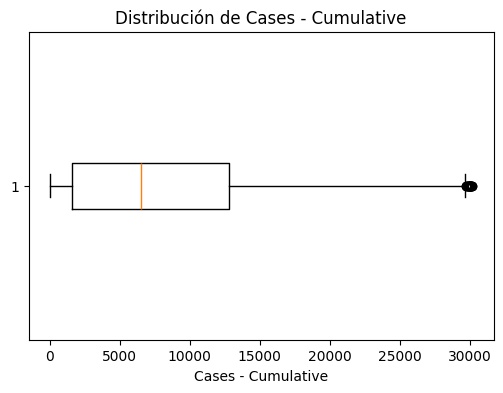

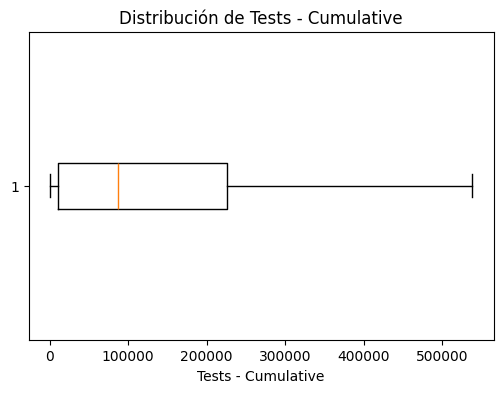

Archivo limpio guardado en 'archivo_limpio_sin_outliers.csv'


In [15]:
# Ejemplo de uso
# Cargar un CSV
ruta_csv = "dataset_balanceado_smote.csv"  # Cambia esto por tu archivo
df = pd.read_csv(ruta_csv)

# Visualizar outliers antes del manejo
def graficar_boxplot(df, columnas):
    for columna in columnas:
        plt.figure(figsize=(6, 4))
        plt.boxplot(df[columna].dropna(), vert=False)
        plt.title(f"Distribución de {columna}")
        plt.xlabel(columna)
        plt.show()

columnas_a_revisar = ["Cases - Cumulative", "Tests - Cumulative"]  # Cambia por las columnas que deseas analizar
print("Outliers antes del manejo:")
graficar_boxplot(df, columnas_a_revisar)

# Manejar outliers
df_limpio = manejar_outliers(
    df,
    columnas=columnas_a_revisar,
    metodo="IQR",         # Método para detectar outliers ("IQR" o "zscore")
    limite=1.5,           # Límite para definir outliers (1.5 para IQR o 3 para z-score)
    accion="reemplazar",  # Acción: "eliminar" o "reemplazar"
    valor_reemplazo=np.nan  # Valor para reemplazar (si aplicable)
)

# Visualizar resultados después del manejo
print("Outliers después del manejo:")
graficar_boxplot(df_limpio, columnas_a_revisar)

# Guardar el DataFrame limpio
df_limpio.to_csv("archivo_limpio_sin_outliers.csv", index=False)
print("Archivo limpio guardado en 'archivo_limpio_sin_outliers.csv'")

# TRANSFORMACIÓN DE DATOS

## NORMALIZACIÓN

### ESTASITICAS BASICAS

In [42]:
import pandas as pd

# Cargar tu dataset
df = pd.read_csv("archivo_limpio_sin_outliers.csv")

# Revisar estadísticas básicas
print(df.describe())


       Week Number  Cases - Weekly  Cases - Cumulative  Case Rate - Weekly  \
count  9735.000000     9735.000000         9627.000000         9735.000000   
mean     25.962506       64.046039         8058.751601          138.955265   
std      14.677071      122.336287         7173.156346          249.678017   
min       1.000000        0.000000            5.000000            0.000000   
25%      14.000000       11.000000         1604.000000           32.273739   
50%      25.000000       31.000000         6554.000000           77.137933   
75%      39.000000       71.000000        12812.000000          154.000000   
max      53.000000     2212.000000        30178.000000         6266.000000   

       Case Rate - Cumulative  Tests - Weekly  Tests - Cumulative  \
count             9735.000000     9735.000000         9735.000000   
mean             17827.987127     1208.507253       131229.703236   
std              12122.375443     1417.737418       136549.862948   
min                  

Si observas que algunas columnas tienen valores en rangos muy diferentes (por ejemplo, una columna entre 0 y 1, y otra entre 1000 y 10000), la normalización es recomendable.

### VARIANZA ENTRE VARIABLES

In [43]:
print(df.var())


Week Number                             2.154164e+02
Cases - Weekly                          1.496617e+04
Cases - Cumulative                      5.145417e+07
Case Rate - Weekly                      6.233911e+04
Case Rate - Cumulative                  1.469520e+08
Tests - Weekly                          2.009979e+06
Tests - Cumulative                      1.864587e+10
Test Rate - Weekly                      1.050851e+07
Test Rate - Cumulative                  8.681914e+10
Percent Tested Positive - Weekly        6.583548e-03
Percent Tested Positive - Cumulative    4.632900e-03
Deaths - Weekly                         2.723116e+00
Deaths - Cumulative                     8.429602e+03
Death Rate - Weekly                     1.193412e+01
Death Rate - Cumulative                 1.908428e+04
Population                              6.963802e+08
ZIP Code                                1.049378e+03
dtype: float64


Si hay una gran diferencia entre las varianzas de las columnas, la normalización puede ayudar a equilibrar su impacto.

### VISUALIZAR DISTRIBUCION

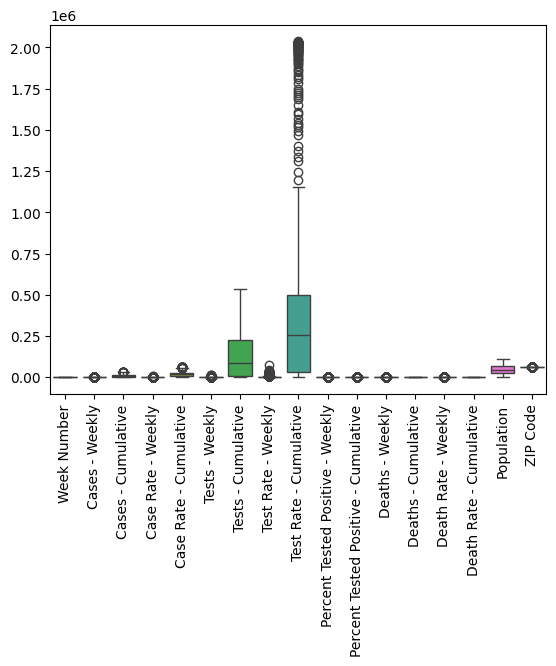

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotar etiquetas si son muchas
plt.show()


Si ves que algunas características tienen valores muy altos en comparación con otras, la normalización es recomendable.

### APLICAR NORMALIZACIÓN

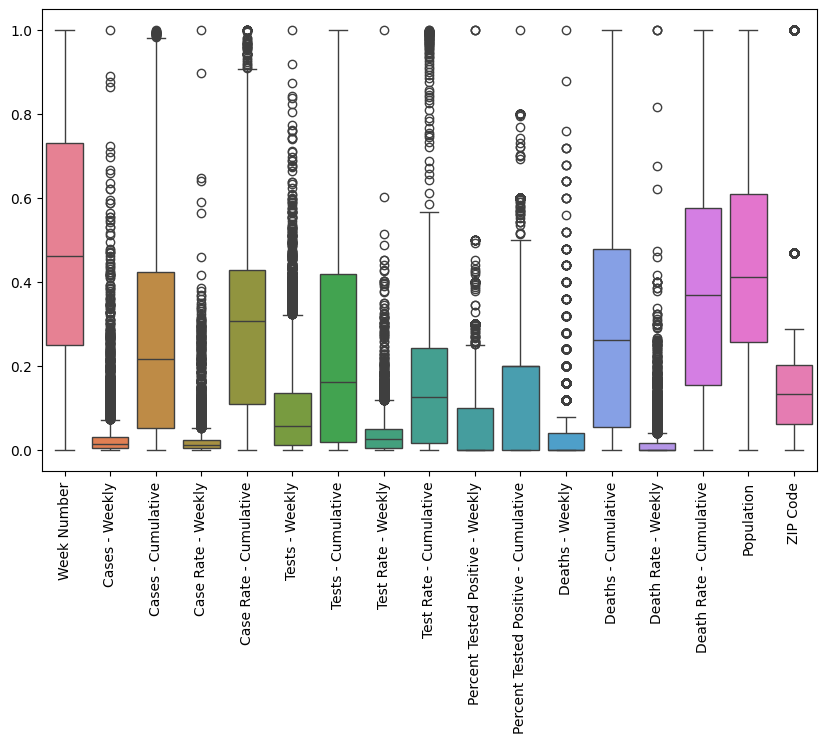

In [45]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que `df` es tu DataFrame sin las columnas categóricas o no numéricas
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Graficar boxplot nuevamente con los datos normalizados
plt.figure(figsize=(10,6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=90)
plt.show()


## BOX COX

In [46]:
import numpy as np

# Calcular la asimetría de cada columna numérica
skewness = df.skew()

# Mostrar columnas con asimetría alta (fuera de [-1,1])
print(skewness[abs(skewness) > 1])


Cases - Weekly                      6.587725
Case Rate - Weekly                  7.604563
Tests - Weekly                      2.021189
Test Rate - Weekly                  4.327689
Test Rate - Cumulative              1.664155
Percent Tested Positive - Weekly    1.855785
Deaths - Weekly                     4.813287
Death Rate - Weekly                 7.963830
ZIP Code                            3.594848
dtype: float64


Si la distribución de una variable es muy asimétrica (valores de skewness fuera del rango 
[−1,1]), puede beneficiarse de una transformación Box-Cox.

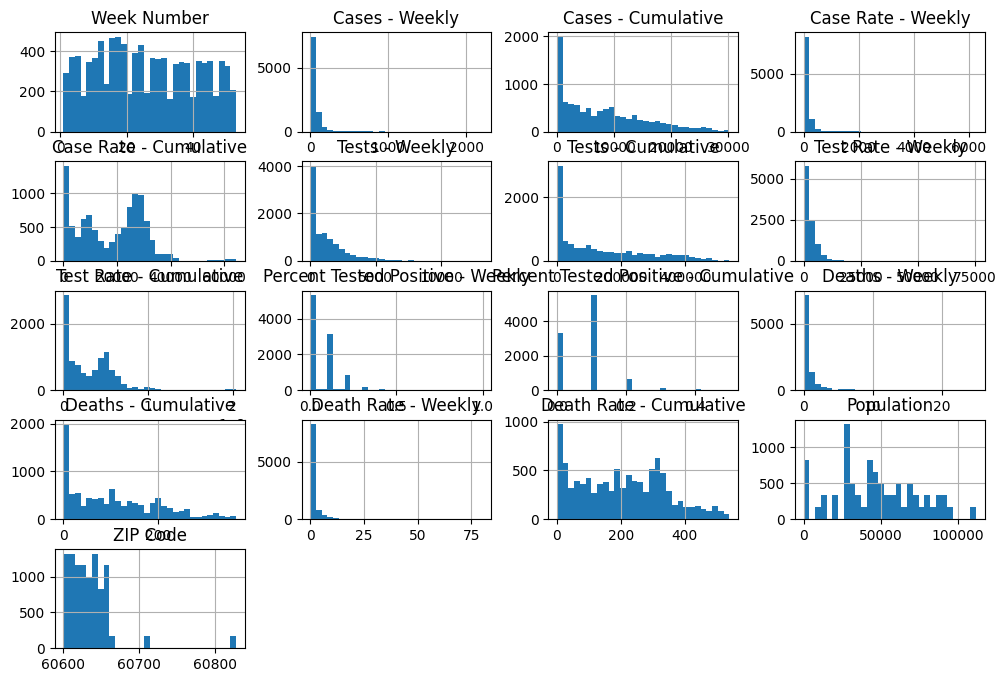

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


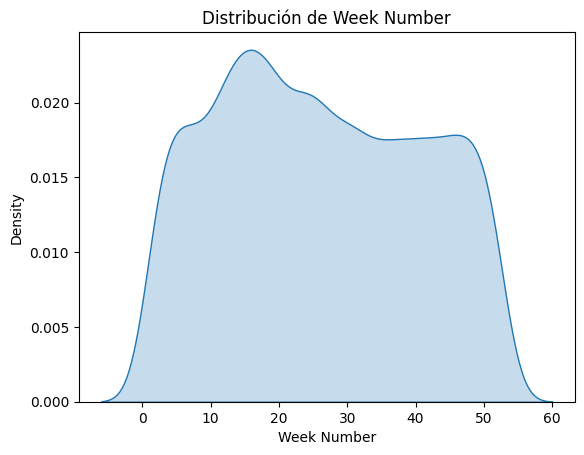

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


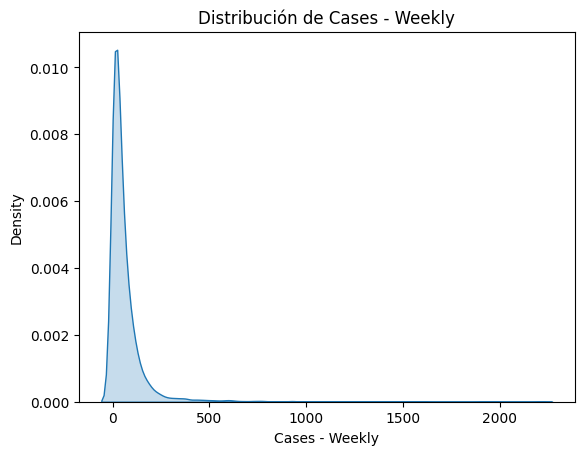

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


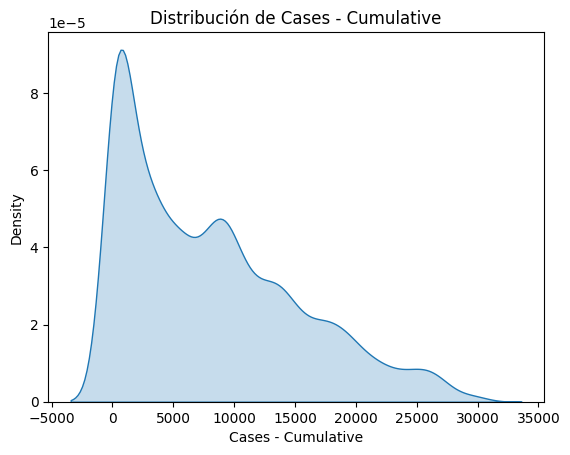

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


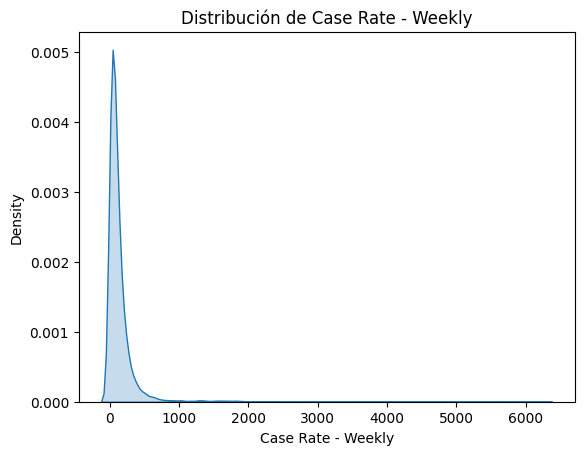

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


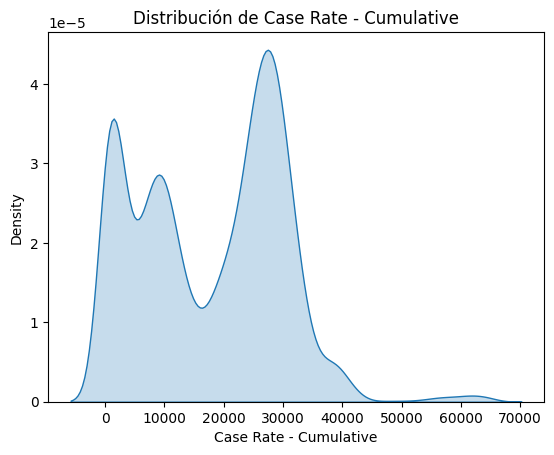

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


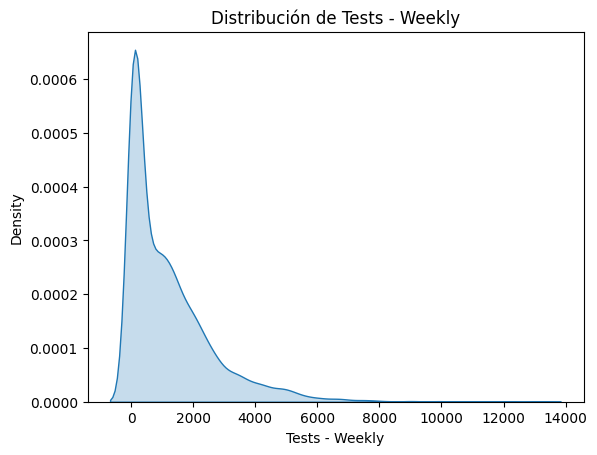

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


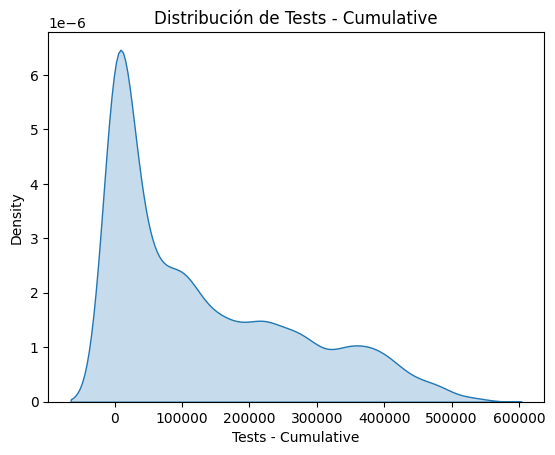

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


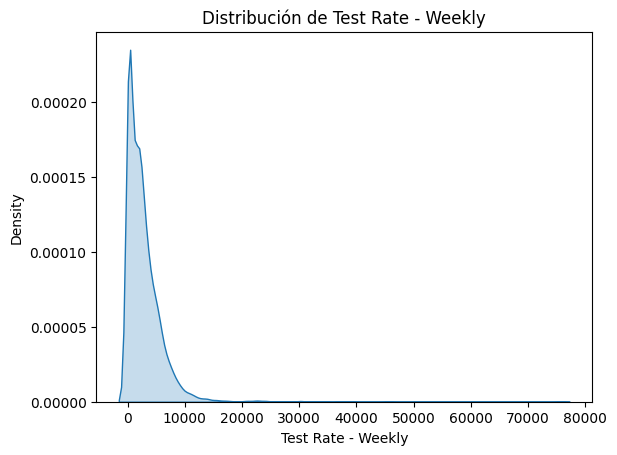

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


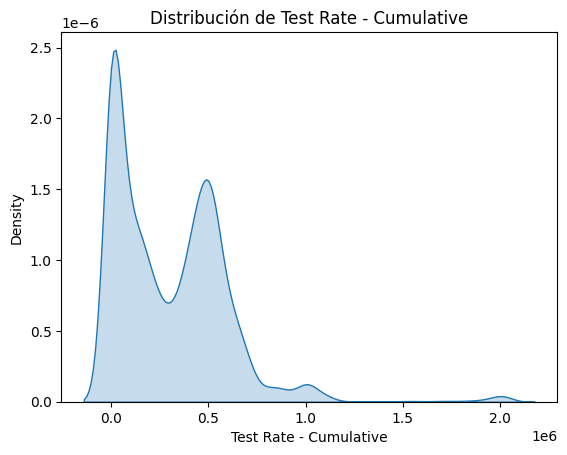

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


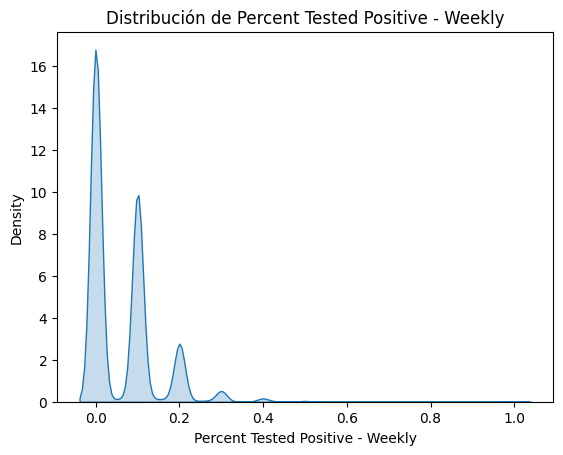

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


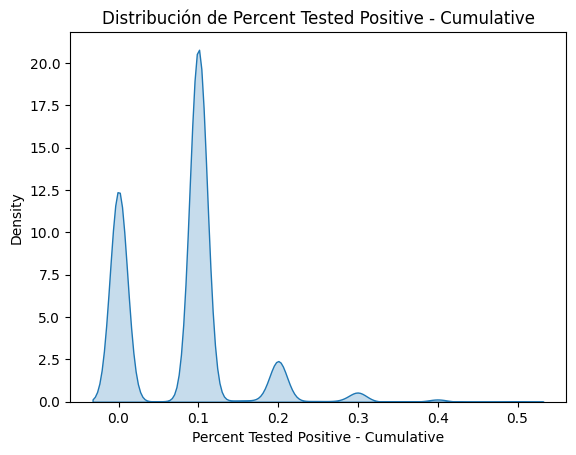

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


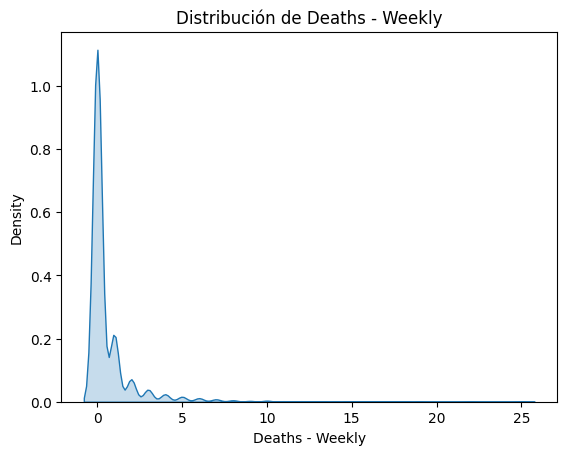

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


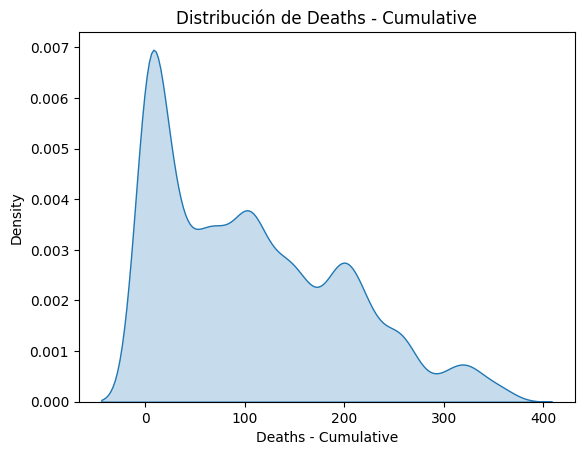

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


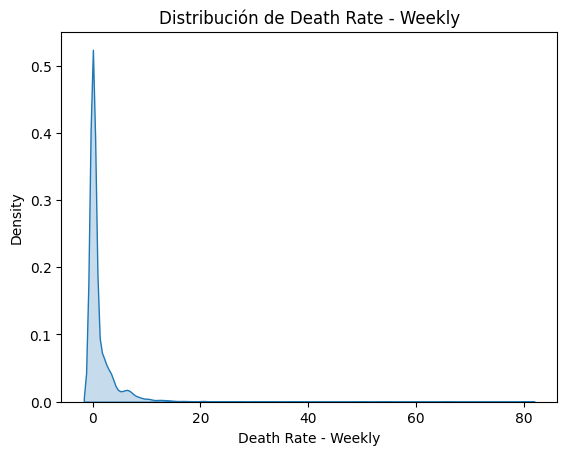

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


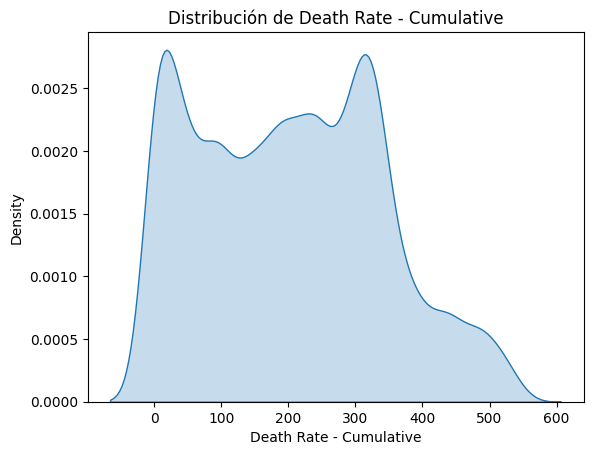

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


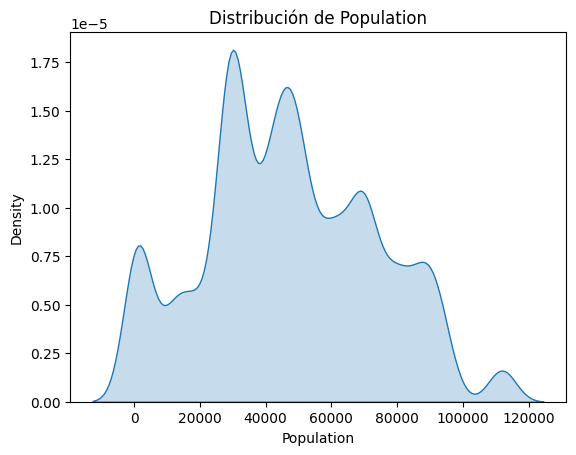

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\670614273.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


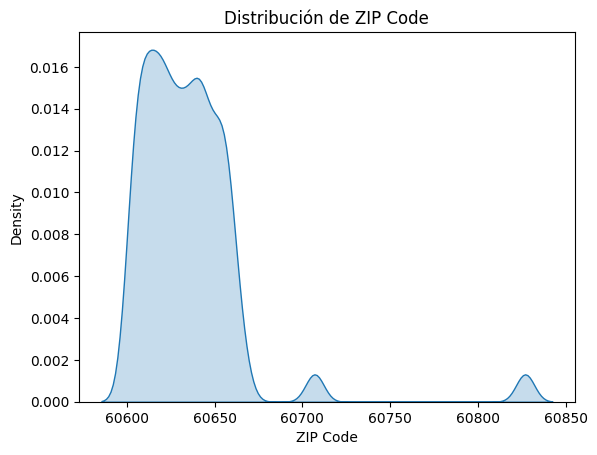

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar histogramas de variables numéricas
df.hist(figsize=(12,8), bins=30)
plt.show()

# KDE de algunas variables clave
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Distribución de {col}')
    plt.show()


Si los gráficos muestran sesgo positivo (cola larga a la derecha) o sesgo negativo (cola larga a la izquierda), Box-Cox puede ayudar.

In [48]:
from scipy.stats import shapiro, ks_1samp, norm

for col in df.select_dtypes(include=[np.number]).columns:
    stat, p = shapiro(df[col].dropna())  # Prueba de Shapiro-Wilk
    print(f"{col}: Estadístico={stat}, p-valor={p}")


Week Number: Estadístico=0.9578412140096504, p-valor=2.5497890567371425e-46
Cases - Weekly: Estadístico=0.44801479831848223, p-valor=2.5161010286716e-99
Cases - Cumulative: Estadístico=0.9090992098031506, p-valor=8.651379342947047e-60
Case Rate - Weekly: Estadístico=0.4420793692670235, p-valor=1.3724890439522295e-99
Case Rate - Cumulative: Estadístico=0.9316893799048206, p-valor=1.0523489580775344e-54
Tests - Weekly: Estadístico=0.7944466265535075, p-valor=1.5210161405034944e-76
Tests - Cumulative: Estadístico=0.8626639684196888, p-valor=4.104377023887311e-68
Test Rate - Weekly: Estadístico=0.7092423151640896, p-valor=3.380759762872481e-84
Test Rate - Cumulative: Estadístico=0.8453817845270506, p-valor=1.539960433702399e-70
Percent Tested Positive - Weekly: Estadístico=0.7206765323001456, p-valor=2.7131639533870332e-83
Percent Tested Positive - Cumulative: Estadístico=0.759475013518603, p-valor=5.766376632840781e-80
Deaths - Weekly: Estadístico=0.4345975598567504, p-valor=6.44432534762

c:\Users\gutie\IA\ANALITICA DE DATOS\AD\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9735.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\gutie\IA\ANALITICA DE DATOS\AD\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9627.
  res = hypotest_fun_out(*samples, **kwds)


Si muchas variables tienen p < 0.05, Box-Cox podría ser útil.

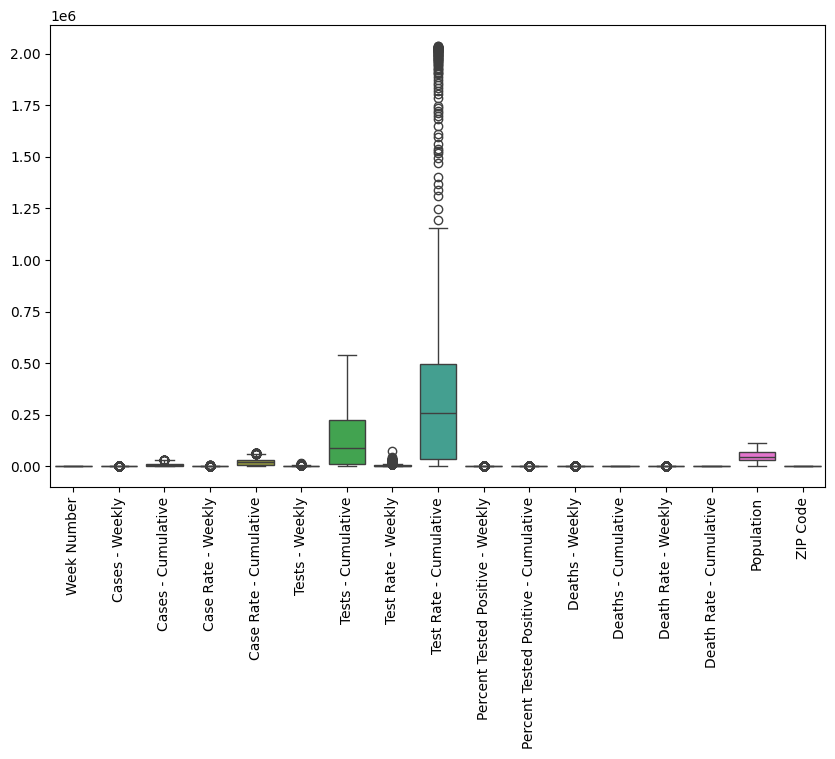

In [49]:
from scipy.stats import boxcox
import numpy as np

# Aplicar Box-Cox solo a columnas numéricas positivas
df_boxcox = df.copy()
for col in df.select_dtypes(include=[np.number]).columns:
    if (df[col] > 0).all():  # Box-Cox solo admite valores positivos
        df_boxcox[col], _ = boxcox(df[col])

# Graficar nuevamente
plt.figure(figsize=(10,6))
sns.boxplot(data=df_boxcox)
plt.xticks(rotation=90)
plt.show()


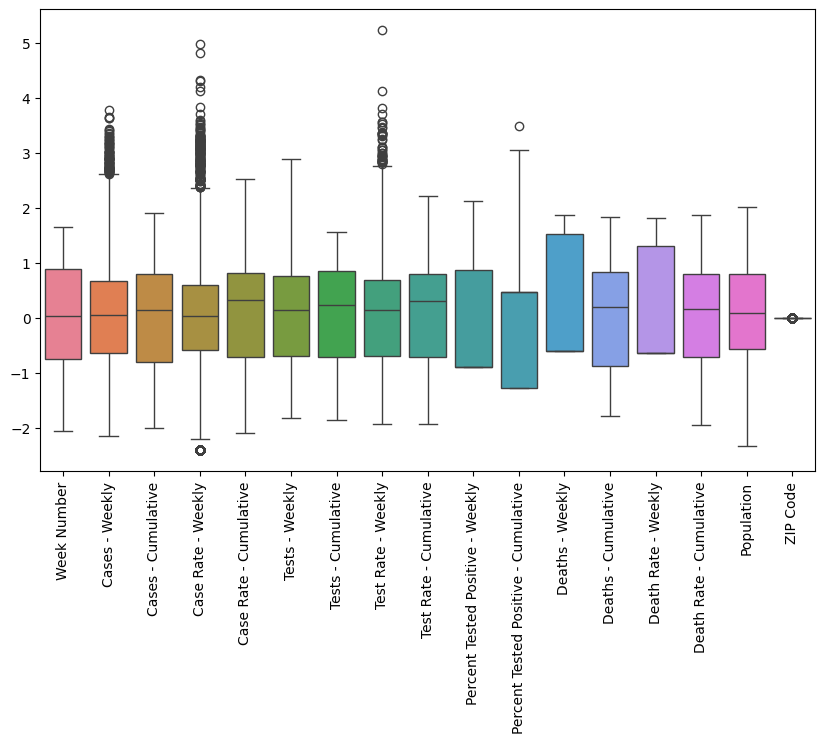

In [51]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(pt.fit_transform(df), columns=df.columns)

# Graficar
plt.figure(figsize=(10,6))
sns.boxplot(data=df_transformed)
plt.xticks(rotation=90)
plt.show()


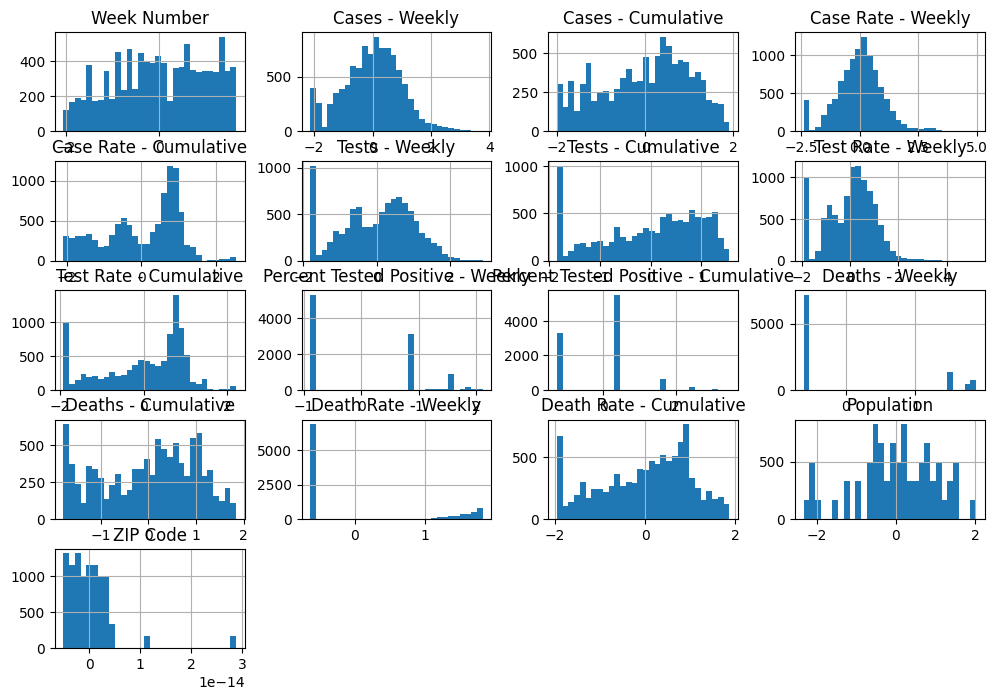

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


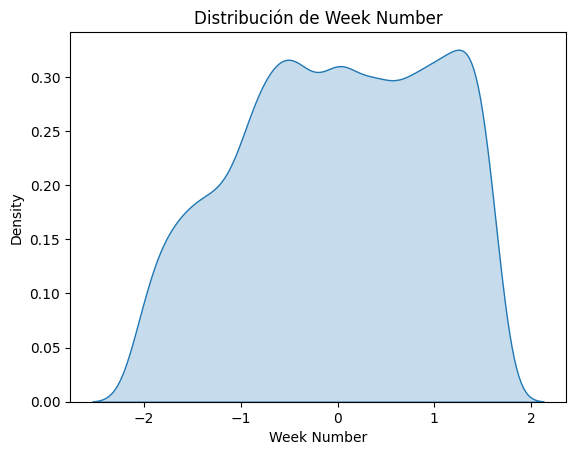

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


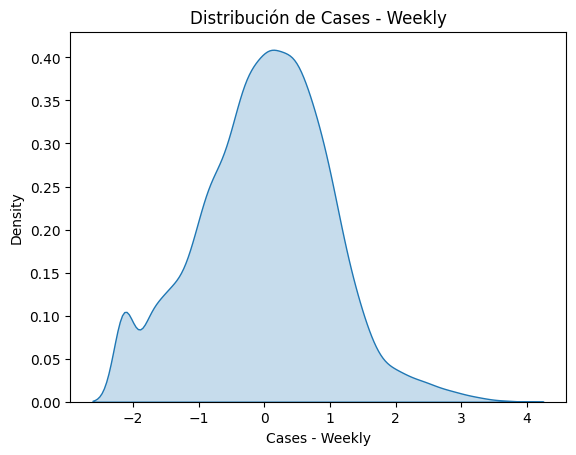

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


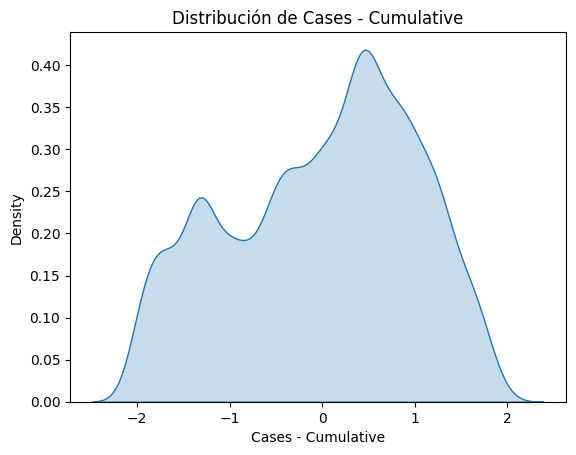

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


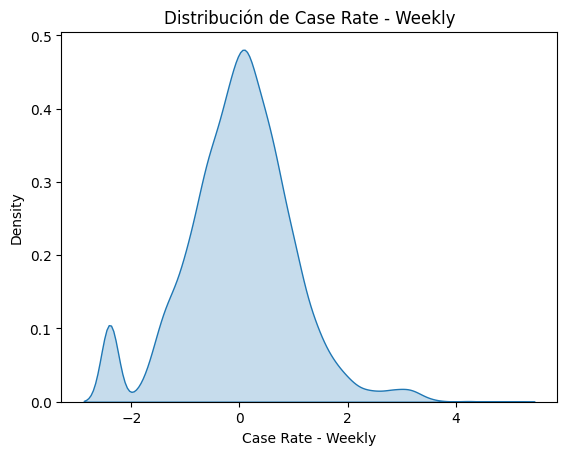

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


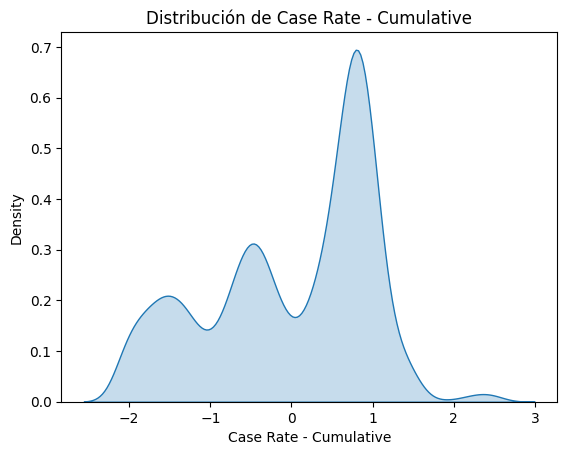

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


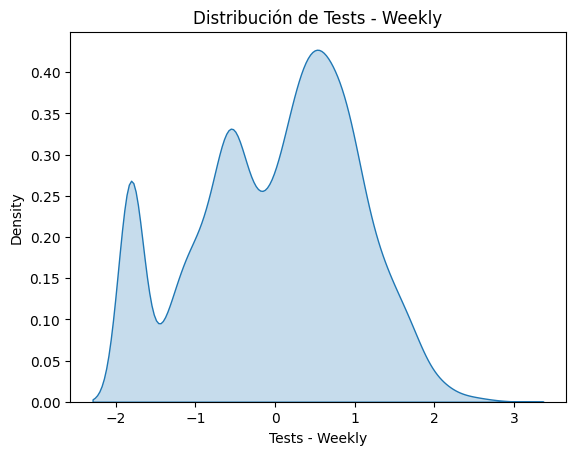

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


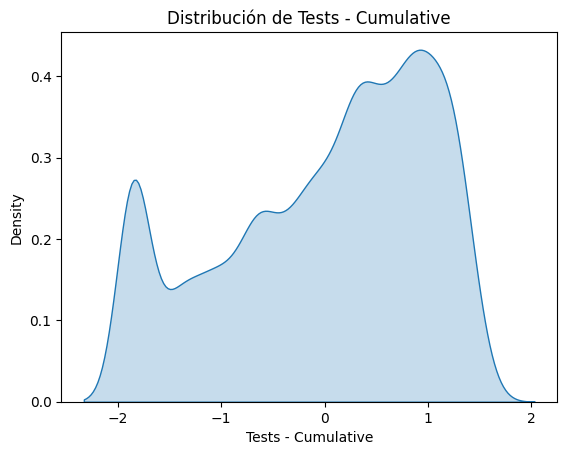

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


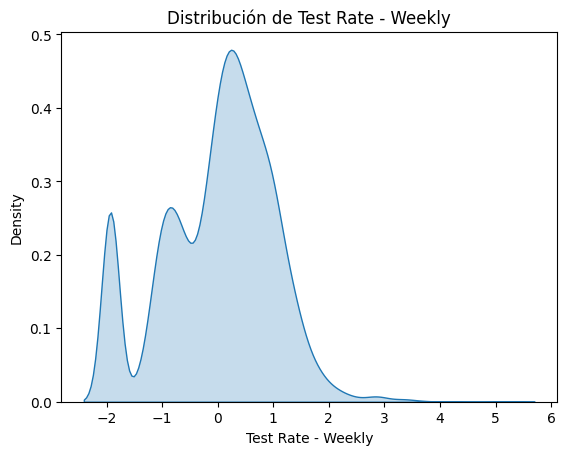

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


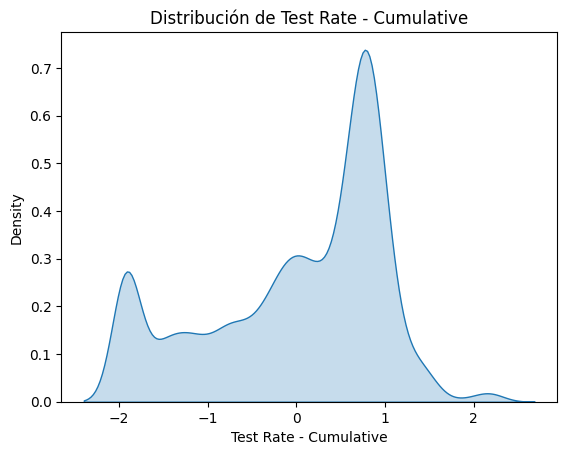

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


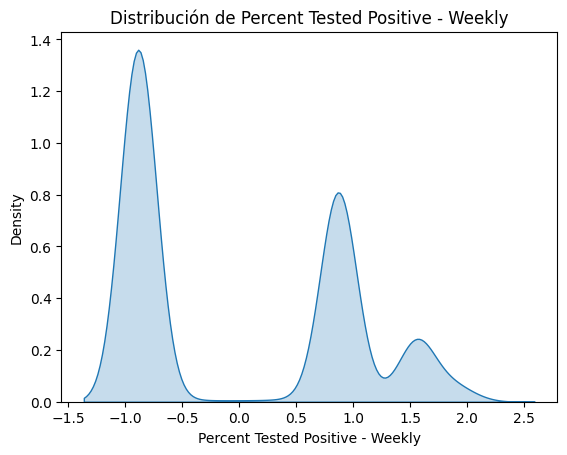

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


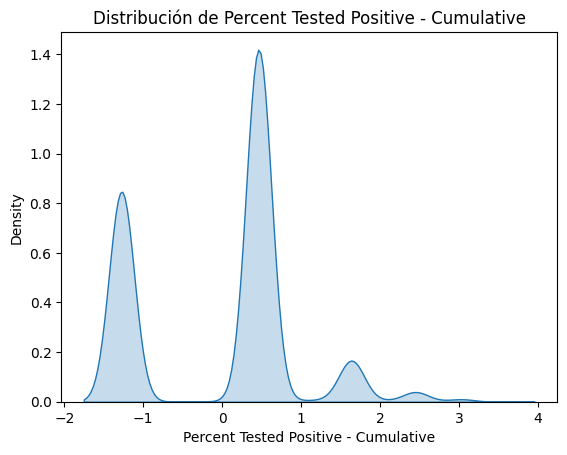

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


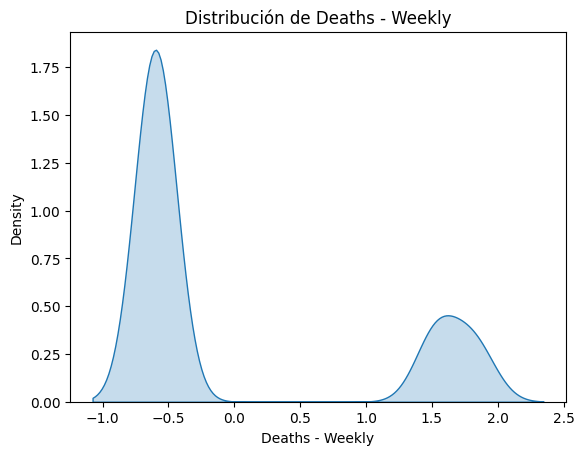

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


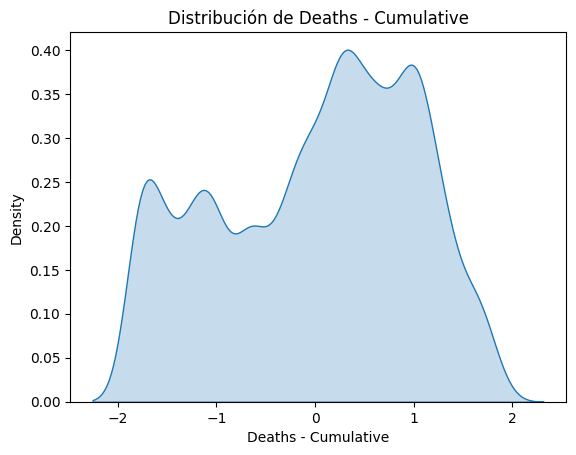

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


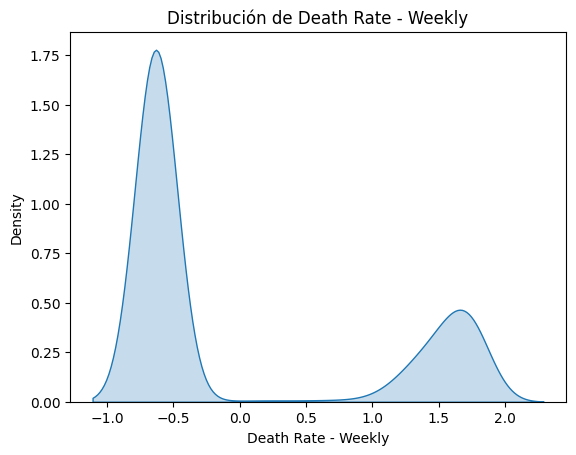

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


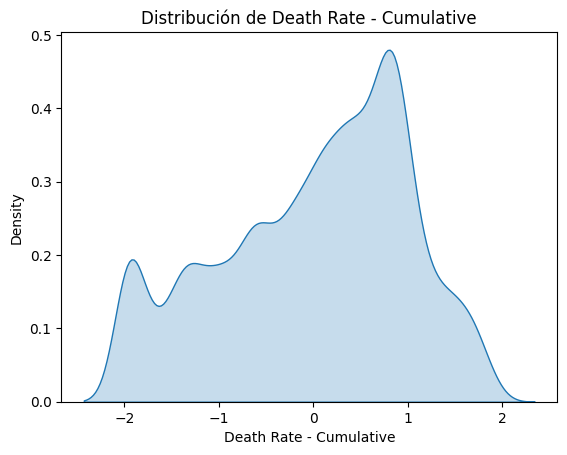

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


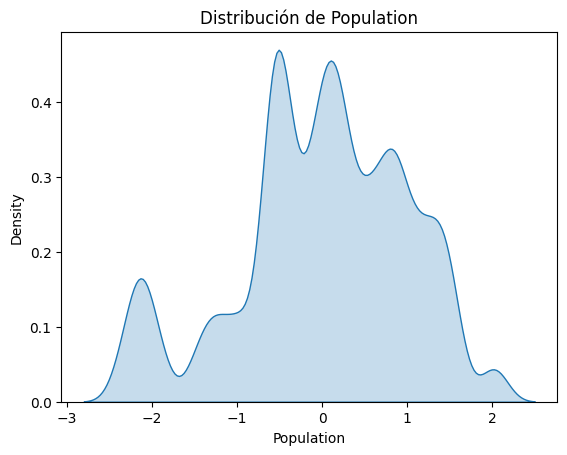

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\81847880.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_transformed[col], shade=True)


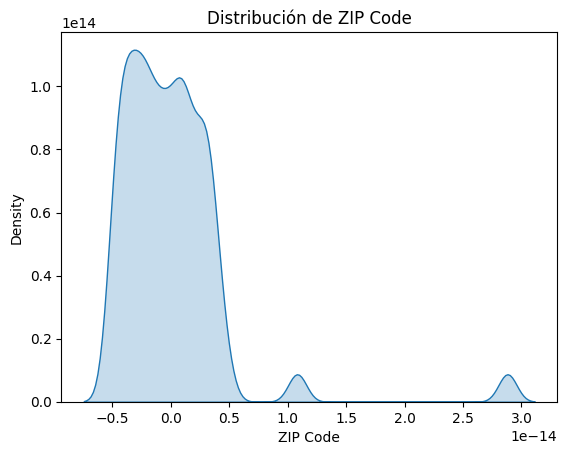

In [52]:
# Graficar histogramas de variables numéricas
df_transformed.hist(figsize=(12,8), bins=30)
plt.show()
# KDE de algunas variables clave
for col in df_transformed.select_dtypes(include=[np.number]).columns:
    plt.figure()
    sns.kdeplot(df_transformed[col], shade=True)
    plt.title(f'Distribución de {col}')
    plt.show()

## ESTANDARIZACION

In [61]:
import pandas as pd

df = pd.read_csv("archivo_limpio_sin_outliers.csv")  
#df=df_transformed

C:\Users\gutie\AppData\Local\Temp\ipykernel_27324\782988431.py:27: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


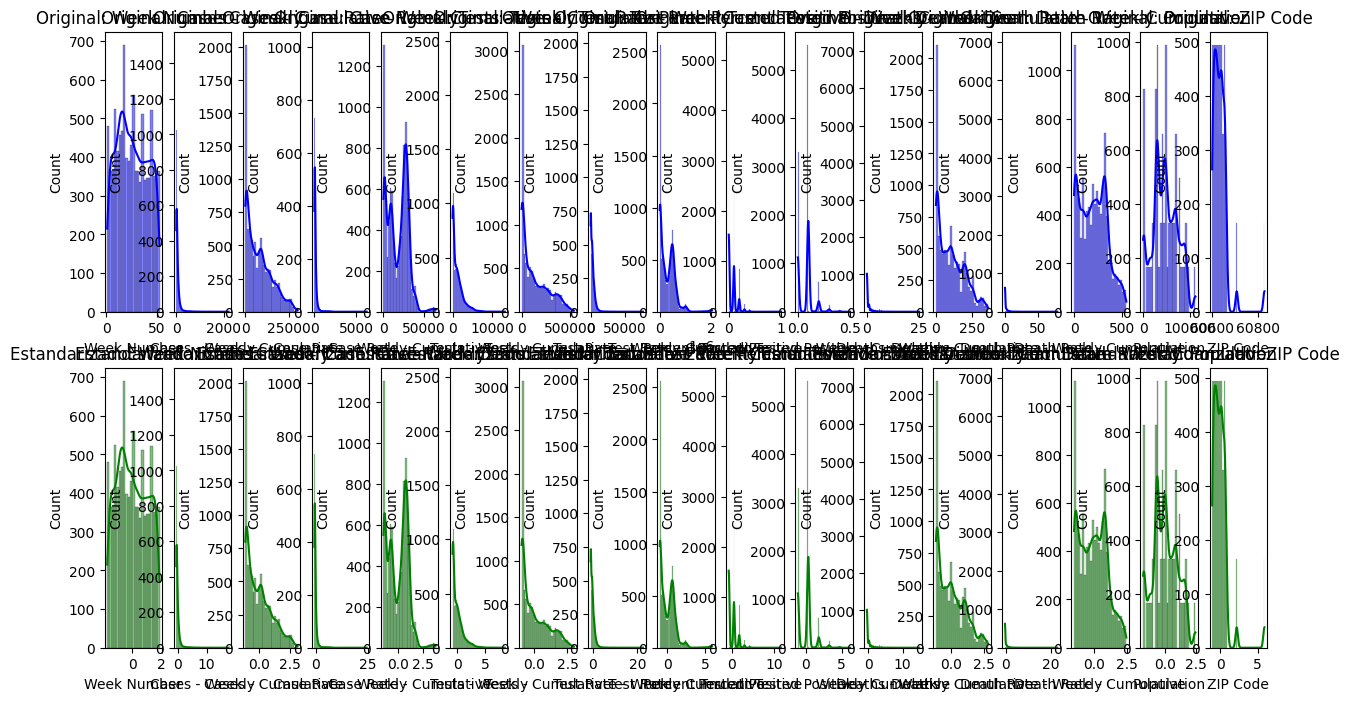

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



# 🔹 Crear un objeto StandardScaler
scaler = StandardScaler()

# 🔹 Aplicar la estandarización (fit_transform) al dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 🔹 Visualización: Comparar distribuciones antes y después de la estandarización
fig, axes = plt.subplots(2, len(df.columns), figsize=(15, 8))

for i, col in enumerate(df.columns):
    # Histograma de los datos originales
    sns.histplot(df[col], ax=axes[0, i], kde=True, color="blue")
    axes[0, i].set_title(f"Original: {col}")

    # Histograma de los datos estandarizados
    sns.histplot(df_scaled[col], ax=axes[1, i], kde=True, color="green")
    axes[1, i].set_title(f"Estandarizado: {col}")

plt.tight_layout()
plt.show()




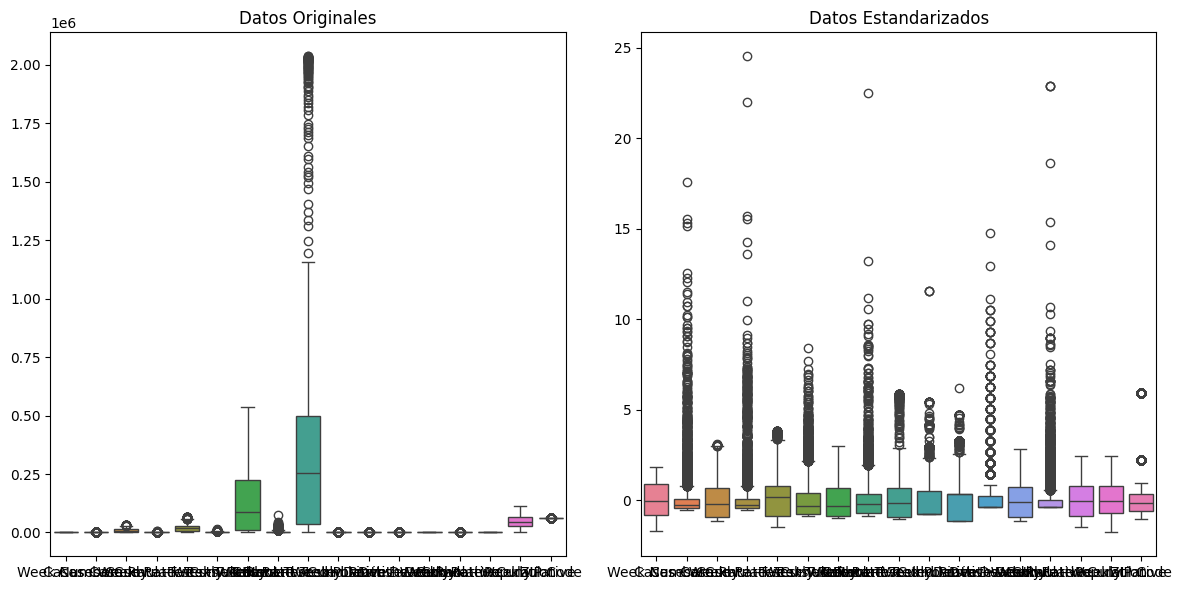

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



# 🔹 Aplicar estandarización
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# 🔹 Visualización con boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 📌 Boxplot de los datos originales
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title("Datos Originales")

# 📌 Boxplot de los datos estandarizados
sns.boxplot(data=df_scaled, ax=axes[1])
axes[1].set_title("Datos Estandarizados")

plt.tight_layout()
plt.show()
